# Refilling the Mediterranean (Zanclean megaflood)

# Eastern Mediterranean (eMed) flood velocity and energy

### Methods adapted from:
Garcia-Castellanos, D., Estrada, F., Jiménez-Munt, I., Gorini, C., Fernàndez, M., Vergés, J. and De Vicente, R., 2009. Catastrophic flood of the Mediterranean after the Messinian salinity crisis. Nature, 462(7274), pp.778-781.


See Methods, Garcia-Castellanos et al.,(2009) for a detailed description.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

## Upload files here

In [2]:
inflow_density = np.loadtxt(fname="wMed_outflow_density.txt") # eMed inflow water density [kg/m^3] [From Script 6]

## Setting parameters

In [3]:
D_sill = 35      # Starting sill depth [m]
Z0 = 0           # Atlantic level [m]
DMar = 1027      # Seawater density [kg m^-3]
g = 9.81         # Acceleration due to gravity [m s^-2]
Kb = 1.8*10**-4  # Shear stress law constant [m yr^-1 Pa^-a]
L = 100000       # Length of the erosive channel [m]
H = 1000         # Head loss - set to 1000 m which is equal to present Alboran Sea depth
S = H/L
a = 1.5          # Shear stress power law exponent 
t = 1            # Starting time [days]
SL_wMed = 1750   # Late Messinian drawdown in wMed [m]
SL_eMed = 2000   # Late Messinian drawdown in eMed [m]
n = 0.05

Kw = 1.1         # Channel width coefficient [m^-1/2 s^1/2]
Aw = 0.5         # empirically determined constant
Wsill = 100      # Starting sill width [m]

# Arrays used for plotting parameters
Ar_SWd = [100]    # Stores sill width
Ar_t   = [0]      # Stores time
Ar_VwM = [0]      # Stores flow velocity entering wMed 
Ar_dis = [0]      # Stores flood discharge
Ar_eR  = [0]      # Stores rate of erosion
Ar_SLw = [-1750]  # Stores rise of sealevel in wMed
Ar_KEw = [0]      # Stores flow energy in wMed
Ar_VeM = [0]      # Stores flow velocity entering eMed
Ar_KEe = [0]      # Stores flow energy entering eMed

SLrise_eMed = [2000]

# Arrays used to calculate correct sea level
x0=[0]
y0=[0]

#Volumes
Vbrine = 236.1953363  # Initial volume of the brine in WMed : Obtained from hypsometry
Vbrine2 = 590.1264956 # Initial volume of the brine in EMed : Obtained from hypsometry
Vbrine3 = 2797.703632 # Total volume of the brine at the level of Sicily sill: Obtained from hypsometry


## Calculation

Methodology is exactly similar to wMed energy calculation.

For eMed energy calculation, wMed outflow density during stage 2 is used.

To approximate the minimum velocity entering the eMed during stage 2, we use present dimensions of the Noto canyon upper erosive channel (4 km width, 400 m depth). 

In [4]:
# Defines a function to calculate common parameters for each flood stage
def Calc_common_parameters(Wsill,Z0,DMar,g,D_sill,Slope,Kb,a):
    AreaSill = Wsill * D_sill                    # Sill area                  
    Rh = D_sill - Z0                             # Hydraulic radius
    v_wMed = (1/n)*(Rh**(2/3))*(Slope**(0.5))    # wMed flow velocity
    Q = v_wMed*AreaSill                          # Discharge 
    Shear = DMar*g*D_sill*Slope                  # Basal shear stress
    Erate = Kb*(Shear**a)                        # Rate of erosion
    Qd = Q*3600*24/10**12                        # Daily discharge
    return [AreaSill, Rh, v_wMed, Q, Shear, Erate, Qd]

In [5]:
# A function to append results into arrays for plotting
def append_parameters(Wsill,t,v_wMed,Q,Erate,SL_wMed,KEwMed,VEmed,KEeMed):
        Ar_SWd.append(Wsill)
        Ar_t.append(t)
        Ar_VwM.append(v_wMed)
        Ar_dis.append(Q)
        Ar_eR.append(Erate/365)
        Ar_SLw.append(-SL_wMed)
        Ar_KEw.append(KEwMed)
        Ar_VeM.append(VEmed)
        Ar_KEe.append(KEeMed)
        return[Ar_SWd,Ar_t,Ar_VwM,Ar_dis,Ar_eR,Ar_SLw,Ar_KEw,Ar_VeM,Ar_KEe]

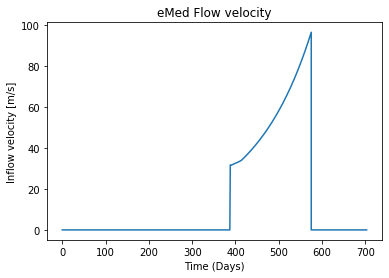

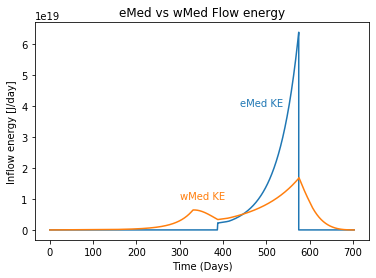

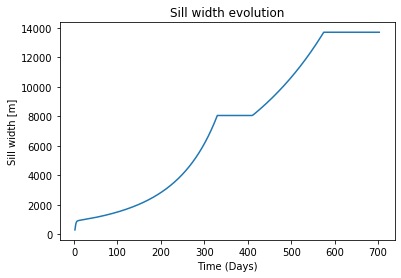

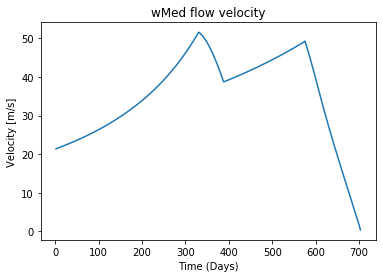

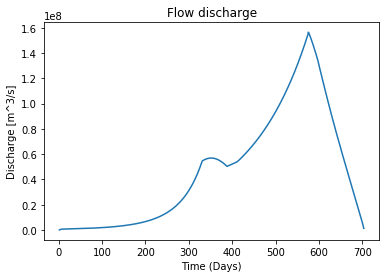

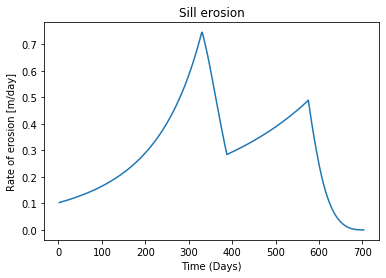

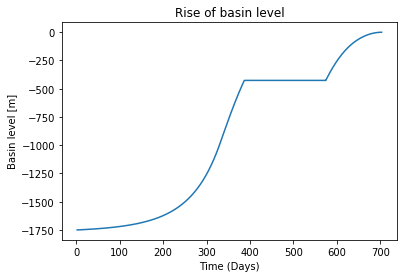

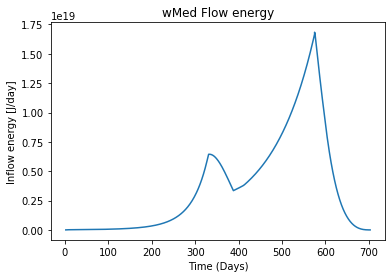

In [6]:
#Stage 1
while SL_wMed>430:
    
    if SL_wMed>1000:
   
        Slope = (1000 - Z0)/L      # this is the slope of the downflow. Maximum headloss set to 1000 m
    
        [AreaSill, Rh, v_wMed, Q, Shear, Erate, Qd] = Calc_common_parameters(Wsill,Z0,DMar,g,D_sill,Slope,Kb,a)
        
        Hypsometrywmed = np.loadtxt(fname="Hypsometry_wMed_Refilling.txt")  # Upload wMed hypsometry
        
        KEwMed = 0.5*Q*v_wMed**2*1027*3600*24   # Flow kinetic energy entering the wMed
        VEmed = 0
        KEeMed = 0
    
        # correct sea-level calculation
        Vbrine = Vbrine+Qd
        for i0,j0,k0 in Hypsometrywmed:
            
            x0.append(k0)
            y0.append(j0)
    
            if Vbrine<k0:
                z = z- ((Vbrine-x0[-2])/j0)
                x0=[]
                y0=[]
                break
            else:
                z=i0
    
        SL_wMed = z
        
        Wsill = Kw*(Q**Aw)  # Sill width at Gibraltar 
        t = t+1             # time

        D_sill = D_sill+(Erate/365)
        [Ar_SWd,Ar_t,Ar_VwM,Ar_dis,Ar_eR,Ar_SLw,Ar_KEw,Ar_VeM,Ar_KEe]=append_parameters(Wsill,t,v_wMed,Q,Erate,SL_wMed,KEwMed,VEmed,KEeMed)

        
    elif SL_wMed<=1000:
   
        Slope = SL_wMed/L
     
        [AreaSill, Rh, v_wMed, Q, Shear, Erate, Qd] = Calc_common_parameters(Wsill,Z0,DMar,g,D_sill,Slope,Kb,a)
        Hypsometrywmed = np.loadtxt(fname="Hypsometry_wMed_Refilling.txt")
        
        KEwMed = 0.5*Q*v_wMed**2*1027*3600*24
        VEmed = 0
        KEeMed = 0
    
        Vbrine = Vbrine+Qd
        for i0,j0,k0 in Hypsometrywmed:
            
            x0.append(k0)
            y0.append(j0)
    
            if Vbrine<k0:
                z = z- ((Vbrine-x0[-2])/j0)
                x0=[]
                y0=[]
                break
            else:
                z=i0
    
        SL_wMed = z
        
        Wsill = Wsill
        t = t+1
        [Ar_SWd,Ar_t,Ar_VwM,Ar_dis,Ar_eR,Ar_SLw,Ar_KEw,Ar_VeM,Ar_KEe]=append_parameters(Wsill,t,v_wMed,Q,Erate,SL_wMed,KEwMed,VEmed,KEeMed)


        D_sill = D_sill+(Erate/365)
        
#Stage 2
while SL_eMed>430:
    
    rhoeMed = inflow_density[t-387]
    Slope   = SL_wMed/L
    
    VEmed = Q/(4000*400)
    KEeMed = 0.5*Q*VEmed**2*rhoeMed*3600*24
    
    [AreaSill, Rh, v_wMed, Q, Shear, Erate, Qd] = Calc_common_parameters(Wsill,Z0,DMar,g,D_sill,Slope,Kb,a)
    Hypsometryemed = np.loadtxt(fname="Hypsometry_eMed_Refilling.txt")
    
    KEwMed = 0.5*Q*v_wMed**2*1027*3600*24
    
    Vbrine2 = Vbrine2+Qd
    
    for i0,j0,k0 in Hypsometryemed:
            
            x0.append(k0)
            y0.append(j0)
    
            if Vbrine2<k0:
                z = z- ((Vbrine2-x0[-2])/j0)
                x0=[]
                y0=[]
                break
            else:
                z=i0
    
    SL_eMed = z

    Wsill2 = Kw*(Q**Aw)
    if Wsill2 < Wsill:
        Wsill2 = Wsill
    else:
        Wsill2 = Wsill2
        Wsill = Wsill2

    t = t+1
    [Ar_SWd,Ar_t,Ar_VwM,Ar_dis,Ar_eR,Ar_SLw,Ar_KEw,Ar_VeM,Ar_KEe]=append_parameters(Wsill,t,v_wMed,Q,Erate,SL_wMed,KEwMed,VEmed,KEeMed)

    D_sill = D_sill+(Erate/365)
    SLrise_eMed.append(SL_eMed)
#Stage 3    
while SL_eMed<430:
    if SL_eMed>0:
        
        Slope = SL_wMed/L
        
        [AreaSill, Rh, v_wMed, Q, Shear, Erate, Qd] = Calc_common_parameters(Wsill,Z0,DMar,g,D_sill,Slope,Kb,a)
        HypsometryWholemed = np.loadtxt(fname="Hypsometry_Stage3_Refilling.txt")
        
        KEwMed = 0.5*Q*v_wMed**2*1027*3600*24
        VEmed = 0
        KEeMed = 0
    
        Vbrine3 = Vbrine3+Qd
        for i0,jw,kw,je,ke,j0,k0 in HypsometryWholemed:
            
            x0.append(k0)
            y0.append(j0)
    
            if Vbrine3<k0:
                z = z-((Vbrine3-x0[-2])/j0)
                x0=[]
                y0=[]
                break
            else:
                z=i0
    
        SL_wMed = z
        SL_eMed = SL_wMed
        
        Wsill=Wsill
        [Ar_SWd,Ar_t,Ar_VwM,Ar_dis,Ar_eR,Ar_SLw,Ar_KEw,Ar_VeM,Ar_KEe]=append_parameters(Wsill,t,v_wMed,Q,Erate,SL_wMed,KEwMed,VEmed,KEeMed)

        t = t+1

        if D_sill<240:
            D_sill = D_sill+(Erate/365) 
        else:
            D_sill = 240
            

    elif SL_wMed==0:
        break
 
    
    if SL_wMed<0.01:
        
        break
 


plt.figure()
plt.title('eMed Flow velocity')
plt.ylabel('Inflow velocity [m/s]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t,Ar_VeM)
plt.figure()
plt.title('eMed vs wMed Flow energy')
plt.ylabel('Inflow energy [J/day]')
plt.xlabel('Time (Days)')
plt.text(300,1*10**19,'wMed KE',color='tab:orange')
plt.text(440,4*10**19,'eMed KE', color='tab:blue')
plt.plot(Ar_t,Ar_KEe)
plt.plot(Ar_t,Ar_KEw)

plt.figure()
plt.title('Sill width evolution')
plt.ylabel('Sill width [m]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_SWd[1:])
plt.figure()
plt.title('wMed flow velocity')
plt.ylabel('Velocity [m/s]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_VwM[1:])
plt.figure()
plt.title('Flow discharge')
plt.ylabel('Discharge [m^3/s]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_dis[1:])
plt.figure()
plt.title('Sill erosion')
plt.ylabel('Rate of erosion [m/day]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_eR[1:])
plt.figure()
plt.title('Rise of basin level')
plt.ylabel('Basin level [m]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_SLw[1:])
plt.figure()
plt.title('wMed Flow energy')
plt.ylabel('Inflow energy [J/day]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_KEw[1:])



np.savetxt("eMed_flow_KE.txt", np.array(Ar_KEe), fmt="%s") 
#np.savetxt("V Emed.txt", np.array(Ar_VeM), fmt="%s") 
np.savetxt("SLrise_eMed.txt", np.array(SLrise_eMed), fmt="%s") 
 